In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import cluster

In [3]:
plt.rcParams['figure.figsize'] = 7,4

# Clustering and Text Analysis

The workshop task this week involves unsupervised learning - an exercise in clustering.   We'll use a the Pokemon dataset to walk through the process of kmeans and hierarchical clustering.  We'll then introduce a text dataset for you to experiment with text analysis.

## Pokemon Clustering

The Pokemon dataset that we used in Week 4 is a good example to use for clustering as it has a number of numerical fields giving the properties of each Pokemon.  We can also imagine that there might be different types of Pokemon within the data, so using clustering methods to find the different types is a reasonable approach.  

First we read the data from the CSV file, we'll use the Pokemon name as the data frame index and drop the first column which is a useless index number. 

In [4]:
df = pd.read_csv('files/Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.shape

(151, 11)

Now you should apply the kMeans clustering method to this data. The first step is to select just the numerical fields in the data.  You can either drop the non-numerical fields or make a new data frame containing just the numerical ones (I suggest making a new data frame).

Then apply the kMeans clustering function to the data, following the steps in the lecture notes and text book.  Since we don't have any real idea how many clusters there could be in the data, start with a small number of clusters (eg. 4) just to make it easier to understand the clusters.

In [6]:
num_df = df[['Total','HP','Attack','Sp. Atk','Sp. Def','Speed','Stage',]]

In [7]:
num_df.describe()

,Total,HP,Attack,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,154.000000,125.000000,140.000000,3.000000


In [8]:
from sklearn import cluster
K=4 
clf = cluster. KMeans(init = 'random', n_clusters = K)
clf.fit(num_df)

C:\Users\abina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=4)

Once you have applied kMeans you will have some results to explore.  Your goal is to understand the clusters that have been produced. If you know something about Pokemon you might be able to recognise similarities between members of each cluster, if not (and even if you do) you need to understand what the members of each cluster have in common. 

The first task is to find out what the members of each cluster are.  To do this, generate a set of cluster labels using `km.predict()` on your original data and add this to the data frame (see the lecture notes).  Now, explore the difference between each cluster:
 
 * find the mean value for each column by cluster, you can do this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method
 * from these means, can you characterise the four clusters that were found, eg. "Cluster 0 are early stage Pokemon with relatively low HP, Attack and Defence ratings".  Provide descriptions like this of each cluster.
 * Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering.  Comment on the separation of clusters in your plot.
 * Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters? 

In [9]:
num_df['label'] = clf.predict(num_df)

C:\Users\abina\AppData\Local\Temp\ipykernel_36700\2645688876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['label'] = clf.predict(num_df)


In [10]:
poke = num_df.groupby(['label']).agg('mean')
poke

,Total,HP,Attack,Sp. Atk,Sp. Def,Speed,Stage
label,,,,,,,
0,425.589744,67.256410,75.538462,70.410256,71.410256,73.487179,1.820513
1,516.843137,83.156863,92.372549,87.980392,85.882353,83.549020,2.000000
2,321.208333,47.000000,57.666667,52.479167,50.062500,53.812500,1.062500
3,238.000000,44.307692,40.769231,29.692308,30.846154,53.769231,1.153846


In [11]:
colormap= np.array(['#00FFFF','#76EEC6','#E3CF57','#FF4040'])

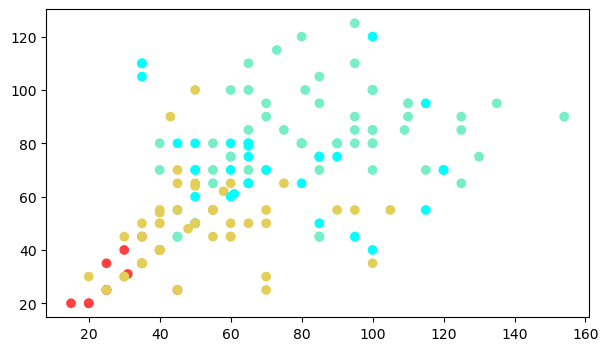

In [12]:
plt.scatter(num_df['Sp. Atk'],num_df['Sp. Def'],c=colormap[num_df['label']])

In [13]:
K=8
km = cluster. KMeans(init = 'random', n_clusters = K)
km.fit(num_df)

C:\Users\abina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random')

In [14]:
num_df['label2'] = km.predict(num_df)

C:\Users\abina\AppData\Local\Temp\ipykernel_36700\2791177266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['label2'] = km.predict(num_df)


In [15]:
pokemo = num_df.groupby(['label2']).agg('mean')
pokemo

,Total,HP,Attack,Sp. Atk,Sp. Def,Speed,Stage,label
label2,,,,,,,,
0,484.545455,59.090909,63.454545,105.909091,86.818182,106.818182,1.909091,0.636364
1,404.857143,62.107143,70.285714,69.642857,64.428571,68.071429,1.892857,0.214286
2,596.428571,93.857143,104.142857,114.142857,95.714286,97.142857,1.428571,1.000000
3,476.105263,71.736842,105.894737,54.789474,72.421053,86.684211,1.736842,0.526316
4,238.000000,44.307692,40.769231,29.692308,30.846154,53.769231,1.153846,3.000000
5,512.500000,167.500000,66.250000,73.750000,101.250000,51.250000,1.250000,0.750000
6,505.625000,81.291667,90.166667,88.458333,87.916667,71.041667,2.333333,1.000000
7,317.844444,46.444444,57.533333,52.866667,49.955556,53.155556,1.022222,2.000000


In [16]:
colormap2= np.array(['#00FFFF','#76EEC6','#E3CF57','#FF4040','#53868B','#76EE00','#B23AEE','#EE1289'])

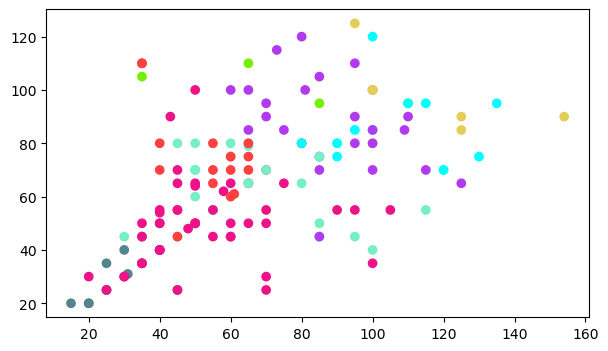

In [17]:
plt.scatter(num_df['Sp. Atk'],num_df['Sp. Def'],c=colormap2[num_df['label2']])

### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

Apply Hiearchical clustering to the data and plot the dendogram.  From this diagram, how many clusters should the data be separated into?   Can you characterise these clusters? 

In [21]:
num_df.head()

,Total,HP,Attack,Sp. Atk,Sp. Def,Speed,Stage,label,label2
Name,,,,,,,,,
Bulbasaur,318,45,49,65,65,45,1,2,7
Ivysaur,405,60,62,80,80,60,2,0,1
Venusaur,525,80,82,100,100,80,3,1,6
Charmander,309,39,52,60,50,65,1,2,7
Charmeleon,405,58,64,80,65,80,2,0,1


In [22]:
numdf = num_df[['Total','HP','Attack','Sp. Atk','Sp. Def','Speed']]

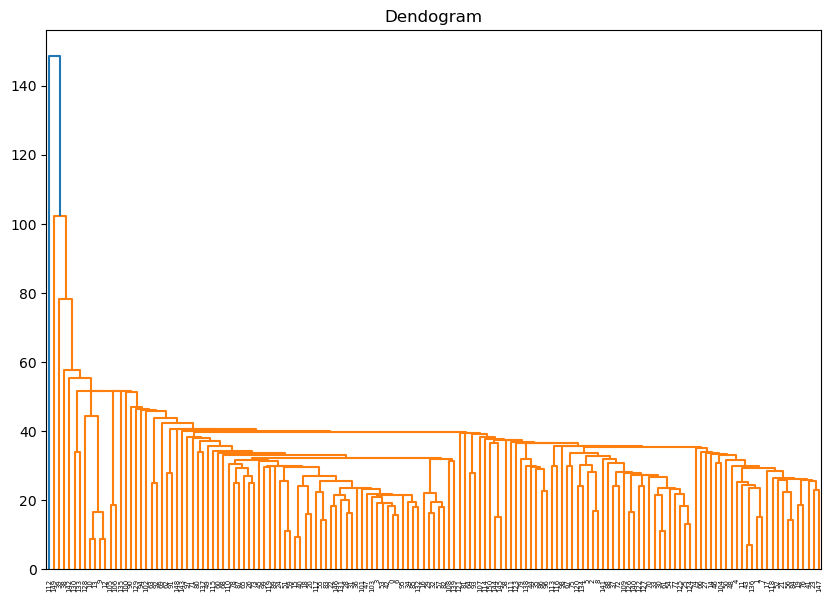

In [23]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendogram = sch.dendrogram(sch.linkage(numdf))
plt.title('Dendogram')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
k=2
hclust = AgglomerativeClustering(n_clusters=k)
cl = hclust.fit_predict(numdf)

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(numdf,cl)

0.5108314288276737